### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Sample Dataset

In [5]:
np.random.seed(42)
n = 200

df = pd.DataFrame({
    "order_date": pd.date_range("2023-01-01", periods=n, freq="D"),
    "category": np.random.choice(["Electronics", "Clothing", "Home", "Sports"], n),
    "price": np.random.randint(10, 500, n),
    "quantity": np.random.randint(1, 10, n),
    "customer_age": np.random.randint(18, 65, n),
    "customer_gender": np.random.choice(["Male", "Female"], n),
    "region": np.random.choice(["North", "South", "East", "West"], n)
})
df["sales"] = df["price"] * df["quantity"]

### Set Theme

In [6]:
sns.set_theme(style="darkgrid")

### Inspect Data

In [7]:
print(df.head())
print(df.isnull().sum()) 

  order_date     category  price  quantity  customer_age customer_gender  \
0 2023-01-01         Home     72         9            53            Male   
1 2023-01-02       Sports    361         3            35          Female   
2 2023-01-03  Electronics    240         9            56            Male   
3 2023-01-04         Home    250         2            49            Male   
4 2023-01-05         Home     61         2            41            Male   

  region  sales  
0   East    648  
1  South   1083  
2   East   2160  
3   East    500  
4   West    122  
order_date         0
category           0
price              0
quantity           0
customer_age       0
customer_gender    0
region             0
sales              0
dtype: int64


### Sales by Product Category

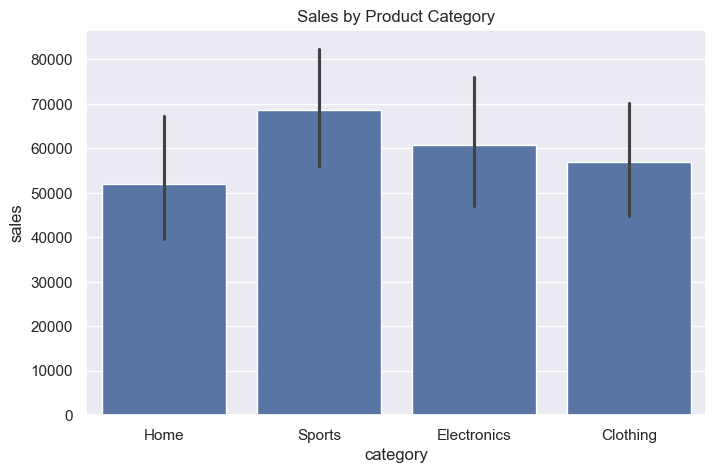

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x="category", y="sales", data=df, estimator=sum)
plt.title("Sales by Product Category")
plt.savefig("sales_by_category.png", dpi=300)
plt.savefig("sales_by_category.svg", dpi=300)
plt.show()

### Customer Age Distribution

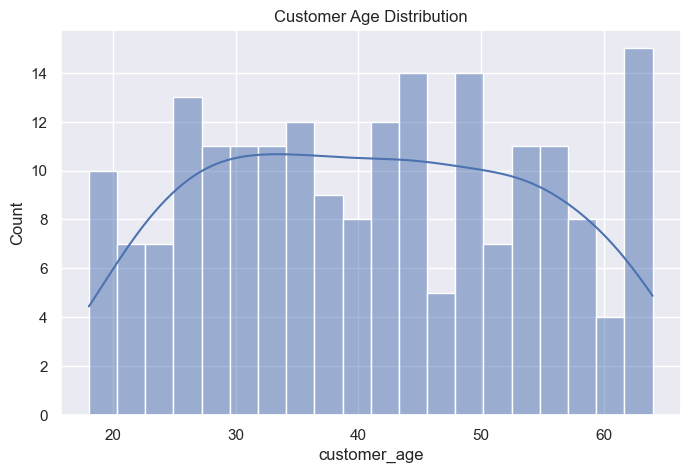

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["customer_age"], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.savefig("customer_age.png", dpi=300)
plt.savefig("customer_age.svg", dpi=300)
plt.show()

### Sales Trends Over Time

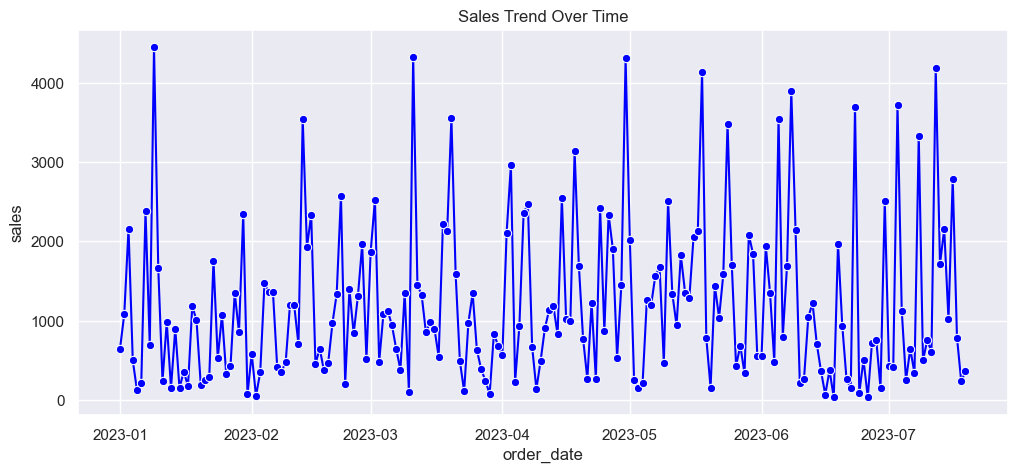

In [11]:
sales_trend = df.groupby("order_date")["sales"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x="order_date", y="sales", data=sales_trend, marker="o", color="blue")
plt.title("Sales Trend Over Time")
plt.savefig("sales_trend.png", dpi=300)
plt.savefig("sales_trend.svg", dpi=300)
plt.show()

### Sales by Region (FacetGrid)

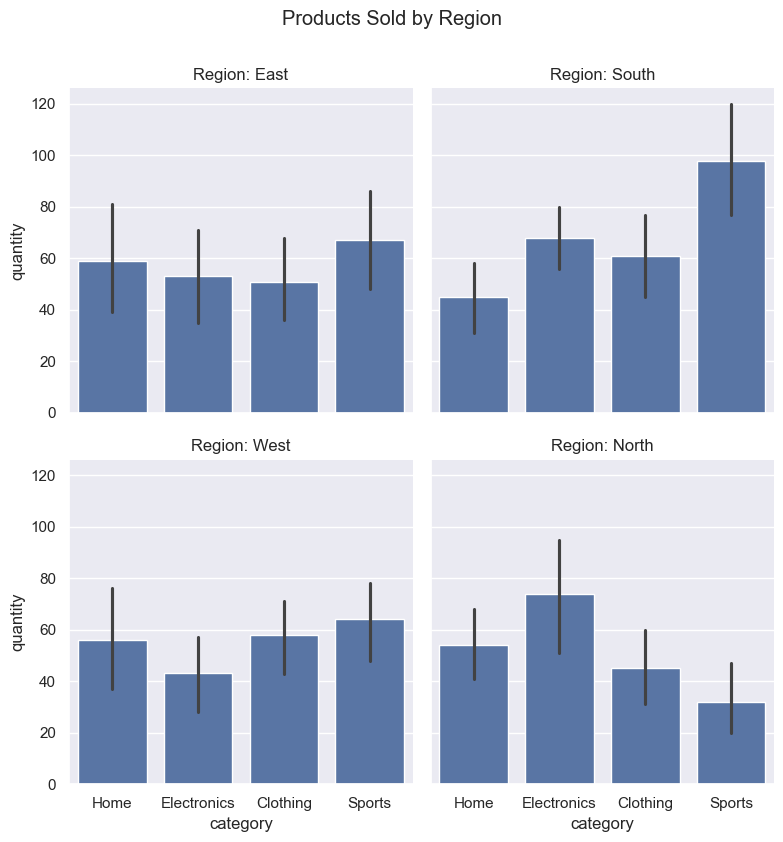

In [14]:
g = sns.FacetGrid(df, col="region", col_wrap=2, height=4)
g.map_dataframe(sns.barplot, x="category", y="quantity", estimator=sum)
g.set_titles("Region: {col_name}")
g.fig.suptitle("Products Sold by Region", y=1.05)
g.savefig("sales_by_region.png", dpi=300)
g.savefig("sales_by_region.svg", dpi=300)
plt.show()

### Price vs Sales Volume

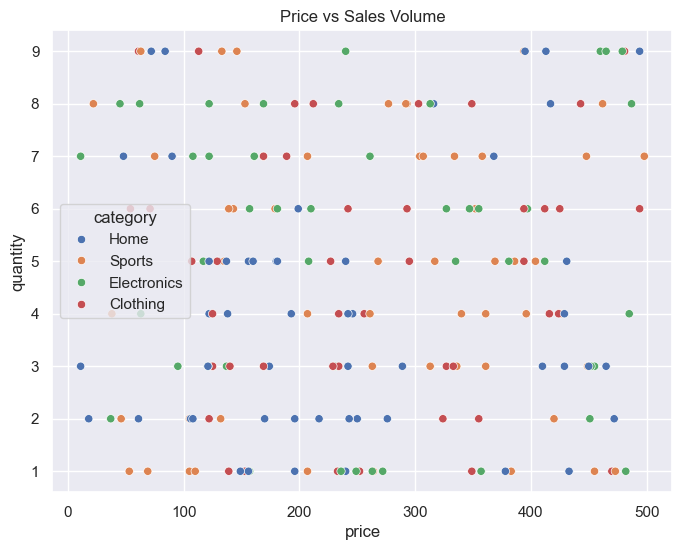

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="price", y="quantity", hue="category", data=df)
plt.title("Price vs Sales Volume")
plt.savefig("price_vs_volume.png", dpi=300)
plt.savefig("price_vs_volume.svg", dpi=300)
plt.show()

### Box Plot: Price by Category

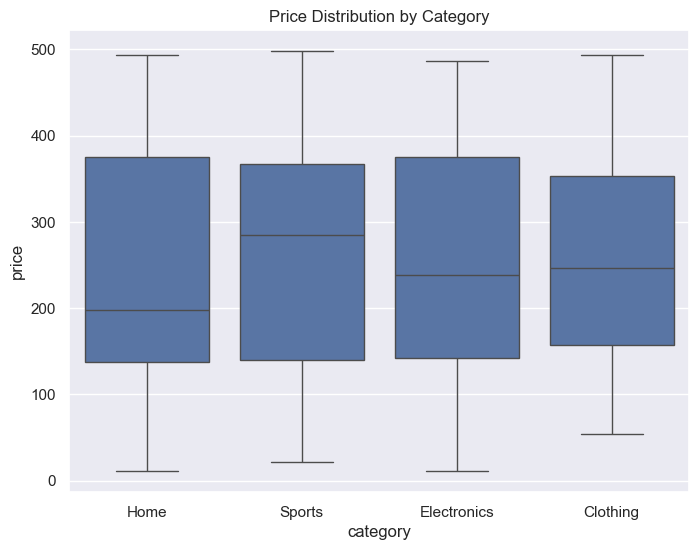

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="category", y="price", data=df)
plt.title("Price Distribution by Category")
plt.savefig("price_box.png", dpi=300)
plt.savefig("price_box.svg", dpi=300)
plt.show()

### Gender vs Sales (FacetGrid)

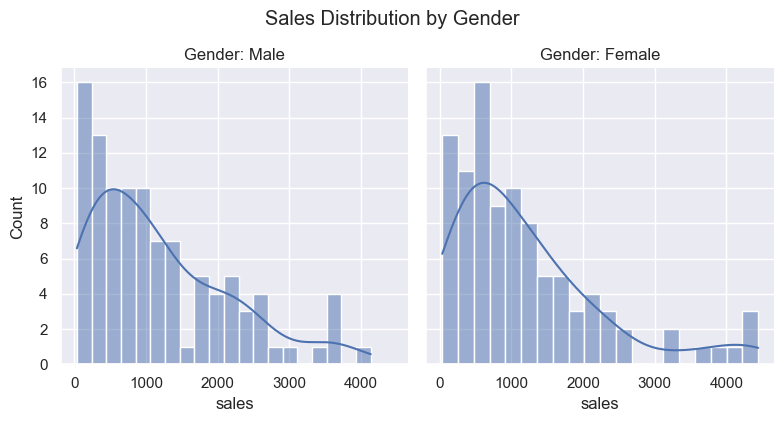

In [17]:
g = sns.FacetGrid(df, col="customer_gender", height=4)
g.map_dataframe(sns.histplot, x="sales", bins=20, kde=True)
g.set_titles("Gender: {col_name}")
g.fig.suptitle("Sales Distribution by Gender", y=1.05)
g.savefig("gender_sales.png", dpi=300)
g.savefig("gender_sales.svg", dpi=300)
plt.show()

### Multi-Panel: Category vs Region

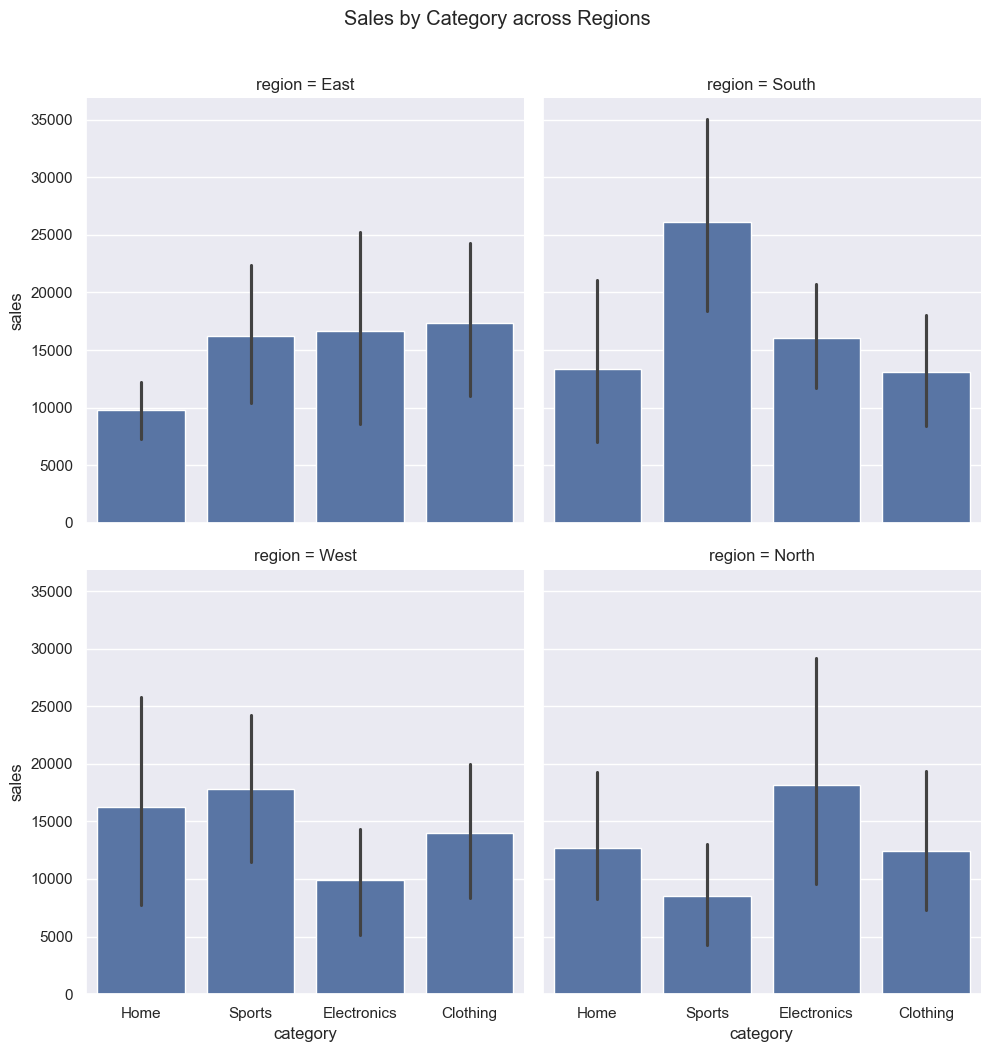

In [21]:
g = sns.catplot(x="category", y="sales", col="region", data=df,
                kind="bar", estimator=sum, col_wrap=2)

g.fig.suptitle("Sales by Category across Regions", y=1.05)
g.savefig("catplot_category_region.png", dpi=300)
g.savefig("catplot_category_region.svg", dpi=300)
plt.show()

### Correlation Heatmap

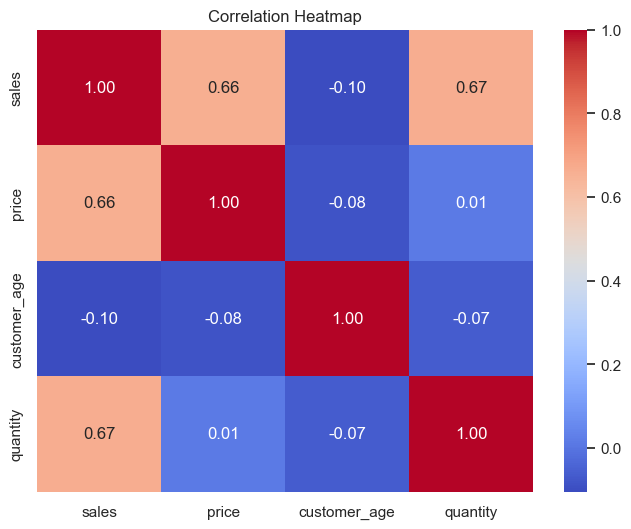

In [22]:
corr = df[["sales","price","customer_age","quantity"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300)
plt.savefig("correlation_heatmap.svg", dpi=300)
plt.show()